In [1]:
import os
import matplotlib.pyplot as plt
import json
import matplotlib.image as mpimg
import numpy as np

rootdir = './test/'           

# Auxiliar functions

In [2]:
def checkJson(json, name=None, initial_lr=None, dropout=None, l2_reg=None, batch_norm=None, data_aug=None):
    if name is not None and json["name_model"]!=name:
        return False
    if initial_lr is not None and json["initial_lr"]!=initial_lr:
        return False
    if dropout is not None and json["dropout"]!=dropout:
        return False
    if l2_reg is not None and json["l2_reg"]!=l2_reg:
        return False
    if batch_norm is not None and json["batch_norm"]!=batch_norm:
        return False
    if data_aug is not None and json["data_aug"]!=data_aug:
        return False
    return True
    
def confidenceInterval(accuracy, n_test):
    return 1.96*np.sqrt(accuracy*(100-accuracy)/n_test)

def getBestValAcc(data):
    return np.amax(np.array(list(data["train_result"]["val_accuracy"].values())))

In [37]:
getBestValAcc(data)


NameError: name 'train_result' is not defined

# MLP graphs

## No regularization

In [ ]:
header = "Learning Rate & "
row = "2 Hidden Layers & "
row4 = "4 Hidden Layers & "
row8 = "8 Hidden Layers & "

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            #print(rootdir+dir+"/experiment.json")
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            if checkJson(data["parameters"], name="MLP-2layers"):
                header += "$"+str('{:.3f}'.format(data["parameters"]["initial_lr"])) + "$ & "
                row+= "$"+str('{:.2f}'.format(getBestValAcc(data)*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000))) + "$ &"
            if checkJson(data["parameters"], name="MLP-4layers"):
                header += "$"+str('{:.3f}'.format(data["parameters"]["initial_lr"])) + "$ & "
                row4+= "$"+str('{:.2f}'.format(getBestValAcc(data)*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000))) + "$ &"
            if checkJson(data["parameters"], name="MLP-8layers"):
                header += "$"+str('{:.3f}'.format(data["parameters"]["initial_lr"])) + "$ & "
                row8+= "$"+str('{:.2f}'.format(getBestValAcc(data)*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000))) + "$ &"

                
print(header[0:-1])
print(row2[0:-1])
print(row4[0:-1])
print(row8[0:-1])

Learning Rate & $0.001$ & $0.002$ & $0.005$ & $0.010$ & $0.001$ & $0.002$ & $0.005$ & $0.010$ & $0.001$ & $0.002$ & $0.005$ & $0.010$ &
2 Hidden Layers & $45.13\pm0.98$ &$48.54\pm0.98$ &$52.81\pm0.98$ &$54.83\pm0.98$ 
4 Hidden Layers & $46.78\pm0.98$ &$50.92\pm0.98$ &$54.22\pm0.98$ &$56.25\pm0.97$ 
8 Hidden Layers & $47.67\pm0.98$ &$52.57\pm0.98$ &$55.86\pm0.97$ &$56.45\pm0.97$ 


In [8]:
name_experiments=["ResNet21","ResNet25"]
info =""
for name_experiment in name_experiments:
    for subdir, dirs, files in os.walk(rootdir): 
        for dir in sorted(dirs):
            if (dir!=".ipynb_checkpoints") and os.path.exists(rootdir+dir+"/experiment.json"):
                f = open(rootdir+dir+"/experiment.json")
                data = json.load(f)
                if data["parameters"]["name_model"].find(name_experiment) != -1:
                    info = data["parameters"]["name_model"] +str(' {:.2f} \pm {:.2f}'.format(getBestValAcc(data)*100,confidenceInterval(getBestValAcc(data)*100, 10_000)))
                    print(info)            
                f.close()  
            


ResNet21_initial_lr_5e-2 63.78 \pm 0.94
ResNet21_initial_lr_1e-2 60.58 \pm 0.96
ResNet21_initial_lr_1e-1 65.16 \pm 0.93
ResNet21_dropout_0.1 66.41 \pm 0.93
ResNet21_dropout_0.1 67.26 \pm 0.92
ResNet21_dropout_0.2 66.77 \pm 0.92
ResNet21_dropout_0.01 64.78 \pm 0.94
ResNet21_dropout_0.5 71.48 \pm 0.88
ResNet21_all 83.79 \pm 0.72
ResNet21_dropout_0.1_new 58.04 \pm 0.97
ResNet21_dropout_0.1_new 61.38 \pm 0.95
ResNet21_dropout_0.25_new 63.01 \pm 0.95
ResNet21_dropout_0.5_new 65.03 \pm 0.93
ResNet25_initial_lr_5e-2 58.68 \pm 0.97
ResNet25_initial_lr_1e-1 61.10 \pm 0.96
ResNet25_dropout_0.1 64.15 \pm 0.94
ResNet25_dropout_0.2 65.12 \pm 0.93
ResNet25_dropout_0.01 62.47 \pm 0.95
ResNet25_dropout_0.01 62.70 \pm 0.95
ResNet25_dropout_0.5 67.55 \pm 0.92
ResNet25_all 82.72 \pm 0.74
ResNet25_initial_lr_1e-2 58.67 \pm 0.97
ResNet25_dropout_0.1_new 58.88 \pm 0.96
ResNet25_dropout_0.25_new 60.42 \pm 0.96
ResNet25_dropout_0.5_new 62.62 \pm 0.95


08_12_27_09 MLP-2layers 0.001
08_12_34_49 MLP-2layers 0.002
08_12_41_05 MLP-2layers 0.005
08_12_45_06 MLP-2layers 0.01
08_12_58_58 MLP-4layers 0.001
08_13_04_02 MLP-4layers 0.002
08_13_09_28 MLP-4layers 0.005
08_13_20_20 MLP-4layers 0.01
08_13_25_30 MLP-8layers 0.001
08_13_31_46 MLP-8layers 0.002
08_13_42_59 MLP-8layers 0.005
08_14_02_50 MLP-8layers 0.01
08_15_55_56 MLP-2layers-reg 0.01
08_16_06_42 MLP-2layers-reg 0.01
08_16_47_29 MLP-2layers-reg 0.01
08_17_16_52 MLP-2layers-reg 0.01
08_17_21_23 MLP-4layers-reg 0.01
08_17_26_08 MLP-4layers-reg 0.01
08_17_30_36 MLP-4layers-reg 0.01
08_17_36_32 MLP-4layers-reg 0.01
08_18_11_19 MLP-8layers-reg 0.01
08_18_19_10 MLP-8layers-reg 0.01
08_18_26_42 MLP-8layers-reg 0.01
08_18_34_11 MLP-8layers-reg 0.01
08_18_52_48 MLP-2layers-dropout 0.01
08_19_04_21 MLP-2layers-dropout 0.01
08_19_09_26 MLP-2layers-dropout 0.01
08_19_22_28 MLP-4layers-dropout 0.01
08_19_29_19 MLP-4layers-dropout 0.01
08_19_34_16 MLP-4layers-dropout 0.01
08_19_38_48 MLP-8layers-d

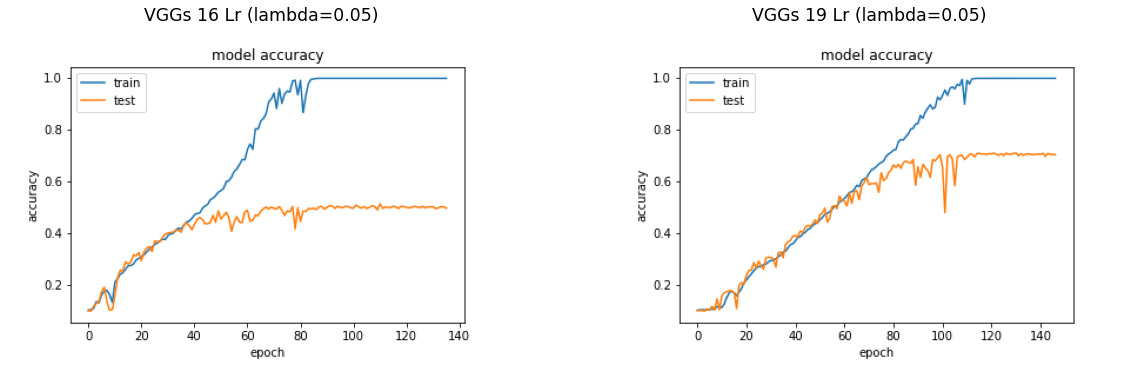

In [9]:
fig, axs = plt.subplots(1, 2,figsize=(20,16))


for ax in axs:
    #for a in ax:
    ax.set_axis_off()

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints") and os.path.exists(rootdir+dir+"/experiment.json"):
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            print(dir,data["parameters"]["name_model"], data["parameters"]["initial_lr"])
            if checkJson(data["parameters"], name="VGG16_initial_lr_5e-2", initial_lr=0.05):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[0].set_title("VGGs 16 Lr (lambda=0.05)", fontsize="xx-large")
                axs[0].imshow(img)
            if checkJson(data["parameters"], name="VGG19_initial_lr_5e-2", initial_lr=0.05):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[1].set_title("VGGs 19 Lr (lambda=0.05)", fontsize="xx-large")
                axs[1].imshow(img)

08_12_27_09 MLP-2layers 0.001
08_12_34_49 MLP-2layers 0.002
08_12_41_05 MLP-2layers 0.005
08_12_45_06 MLP-2layers 0.01
08_12_58_58 MLP-4layers 0.001
08_13_04_02 MLP-4layers 0.002
08_13_09_28 MLP-4layers 0.005
08_13_20_20 MLP-4layers 0.01
08_13_25_30 MLP-8layers 0.001
08_13_31_46 MLP-8layers 0.002
08_13_42_59 MLP-8layers 0.005
08_14_02_50 MLP-8layers 0.01
08_15_55_56 MLP-2layers-reg 0.01
08_16_06_42 MLP-2layers-reg 0.01
08_16_47_29 MLP-2layers-reg 0.01
08_17_16_52 MLP-2layers-reg 0.01
08_17_21_23 MLP-4layers-reg 0.01
08_17_26_08 MLP-4layers-reg 0.01
08_17_30_36 MLP-4layers-reg 0.01
08_17_36_32 MLP-4layers-reg 0.01
08_18_11_19 MLP-8layers-reg 0.01
08_18_19_10 MLP-8layers-reg 0.01
08_18_26_42 MLP-8layers-reg 0.01
08_18_34_11 MLP-8layers-reg 0.01
08_18_52_48 MLP-2layers-dropout 0.01
08_19_04_21 MLP-2layers-dropout 0.01
08_19_09_26 MLP-2layers-dropout 0.01
08_19_22_28 MLP-4layers-dropout 0.01
08_19_29_19 MLP-4layers-dropout 0.01
08_19_34_16 MLP-4layers-dropout 0.01
08_19_38_48 MLP-8layers-d

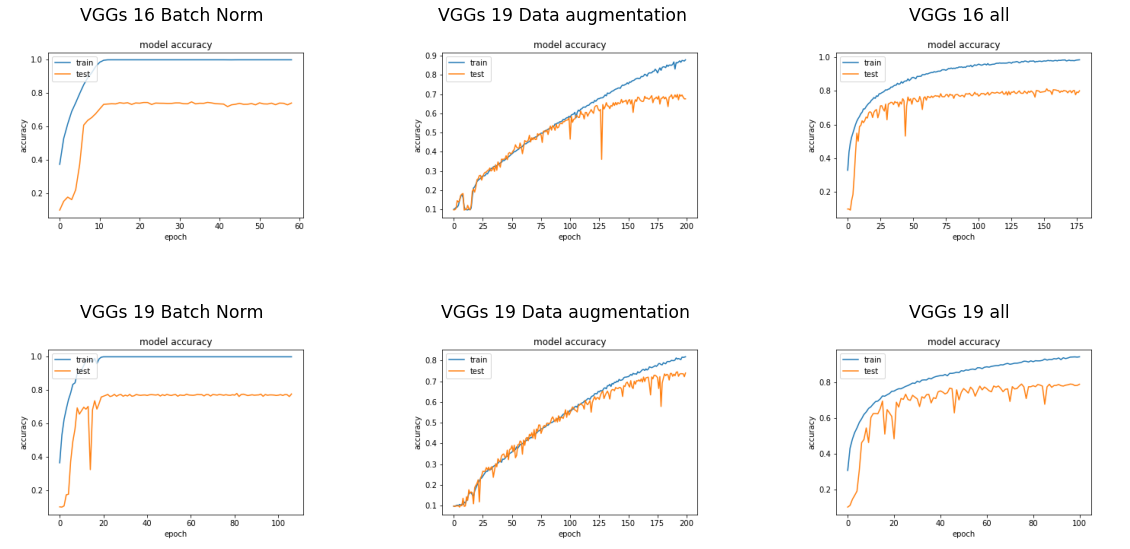

In [20]:
fig, axs = plt.subplots(3, 3,figsize=(20,16))


for ax in axs:
    for a in ax:
        a.set_axis_off()

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints") and os.path.exists(rootdir+dir+"/experiment.json"):
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            print(dir,data["parameters"]["name_model"], data["parameters"]["initial_lr"])
            if checkJson(data["parameters"], name="VGG16_batch_norm", batch_norm=True):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[0,0].set_title("VGGs 16 Batch Norm", fontsize="xx-large")
                axs[0,0].imshow(img)
            if checkJson(data["parameters"], name="VGG19_batch_norm", batch_norm=True):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[0,1].set_title("VGGs 19 Batch Norm", fontsize="xx-large")
                axs[0,1].imshow(img)
            if checkJson(data["parameters"], name="VGG16_data_augmentation", data_aug=True):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[1,0].set_title("VGGs 19 Data augmentation ", fontsize="xx-large")
                axs[1,0].imshow(img)
            if checkJson(data["parameters"], name="VGG19_data_augmentation", data_aug=True):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[1,1].set_title("VGGs 19 Data augmentation", fontsize="xx-large")
                axs[1,1].imshow(img)
            if checkJson(data["parameters"], name="VGG16_all",batch_norm=True, data_aug=True):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[2,1].set_title("VGGs 16 all", fontsize="xx-large")
                axs[2,1].imshow(img)
            if checkJson(data["parameters"], name="VGG19_all",batch_norm=True, data_aug=True):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[2,1].set_title("VGGs 19 all", fontsize="xx-large")
                axs[2,1].imshow(img)

In [ ]:
header = "L2 regularization $\lambda$ & "
row2 = "2 Hidden Layers & "
row4 = "4 Hidden Layers & "
row8 = "8 Hidden Layers & "

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            #print(rootdir+dir+"/experiment.json")
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            if checkJson(data["parameters"], name="MLP-2layers-reg"):
                # header += "$"+str('{:.3f}'.format(data["parameters"]["l2_reg"])) + "$ & "
                row2+= "$"+str('{:.2f}'.format(getBestValAcc(data)*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000))) + "$ &"
            if checkJson(data["parameters"], name="MLP-4layers-reg"):
                # header += "$"+str('{:.3f}'.format(data["parameters"]["l2_reg"])) + "$ & "
                row4+= "$"+str('{:.2f}'.format(getBestValAcc(data)*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000))) + "$ &"
            if checkJson(data["parameters"], name="MLP-8layers-reg"):
                # header += "$"+str('{:.3f}'.format(data["parameters"]["l2_reg"])) + "$ & "
                row8+= "$"+str('{:.2f}'.format(getBestValAcc(data)*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000))) + "$ &"
    
                
print(header[0:-1])
print(row2[0:-1]+ " \\")
print(row4[0:-1]+ " \\")
print(row8[0:-1]+ " \\")

FileNotFoundError: [Errno 2] No such file or directory: './test/05_20_49_09/experiment.json'

In [ ]:
header = "Dropout & "
row2 = "2 Hidden Layers & "
row4 = "4 Hidden Layers & "
row8 = "8 Hidden Layers & "

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            #print(rootdir+dir+"/experiment.json")
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            if checkJson(data["parameters"], name="MLP-2layers-dropout"):
                header += "$"+str('{:.3f}'.format(data["parameters"]["dropout"])) + "$ & "
                row2+= "$"+str('{:.2f}'.format(getBestValAcc(data)*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000))) + "$ &"
            if checkJson(data["parameters"], name="MLP-4layers-dropout"):
                # header += "$"+str('{:.3f}'.format(data["parameters"]["l2_reg"])) + "$ & "
                row4+= "$"+str('{:.2f}'.format(getBestValAcc(data)*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000))) + "$ &"
            if checkJson(data["parameters"], name="MLP-8layers-dropout"):
                # header += "$"+str('{:.3f}'.format(data["parameters"]["l2_reg"])) + "$ & "
                row8+= "$"+str('{:.2f}'.format(getBestValAcc(data)*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000))) + "$ &"
    
                
print(header[0:-1])
print(row2[0:-1]+ " \\")
print(row4[0:-1]+ " \\")
print(row8[0:-1]+ " \\")

## Regularization

In [ ]:
datas = [[None for _ in range(3)] for _ in range(10)]

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            
            if dir == "08_20_57_07":
                continue
            
            i,j = -1,-1
            
            if "2" in data["parameters"]["name_model"]:
                i = 0
            elif "4" in data["parameters"]["name_model"]:
                i = 1
            elif "8" in data["parameters"]["name_model"]:
                i = 2
            
            if data["parameters"]["batch_norm"] and data["parameters"]["dropout"]>0:
                j = 9
                print("y")
            elif "l2_reg" in data["parameters"].keys() and data["parameters"]["l2_reg"]>0:
                if data["parameters"]["l2_reg"]==0.001:
                    j = 0
                elif data["parameters"]["l2_reg"]==0.002:
                    j = 1
                elif data["parameters"]["l2_reg"]==0.005:
                    j = 2
                elif data["parameters"]["l2_reg"]==0.010:
                    j = 3
            elif data["parameters"]["dropout"]>0:
                if data["parameters"]["dropout"]==0.10:
                    j = 4
                elif data["parameters"]["dropout"]==0.25:
                    j = 5
                elif data["parameters"]["dropout"]==0.50:
                    j = 6
            elif data["parameters"]["batch_norm"]:
                j = 7
            elif data["parameters"]["data_aug"]:
                j = 8
                           
            #print(dir, i, j)
            acc = '{:.2f}'.format(getBestValAcc(data)*100)
            ci = '{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000))
                
            if i!=-1 and j!=-1:
                datas[j][i]={"acc":acc, "ci":ci}
    
for row in datas:
    r = ""
    for col in row:
        #print(row,col)
        if col is not None:
            r += "$"+col["acc"]+"\pm"+col["ci"]+ "$ &"
    print(r[0:-1]+ "\\\\")
                


y
y
y
$54.45\pm0.98$ &$55.66\pm0.97$ &$57.14\pm0.97$ \\
$53.46\pm0.98$ &$54.86\pm0.98$ &$57.16\pm0.97$ \\
$51.16\pm0.98$ &$52.20\pm0.98$ &$51.37\pm0.98$ \\
$46.21\pm0.98$ &$45.07\pm0.98$ &$41.90\pm0.97$ \\
$55.30\pm0.97$ &$56.21\pm0.97$ &$56.16\pm0.97$ \\
$55.70\pm0.97$ &$55.94\pm0.97$ &$54.11\pm0.98$ \\
$54.69\pm0.98$ &$52.55\pm0.98$ &$22.92\pm0.82$ \\
$53.76\pm0.98$ &$52.10\pm0.98$ &$49.09\pm0.98$ \\
$47.21\pm0.98$ &$50.66\pm0.98$ &$52.59\pm0.98$ \\
$55.60\pm0.97$ &$55.96\pm0.97$ &$55.26\pm0.97$ \\


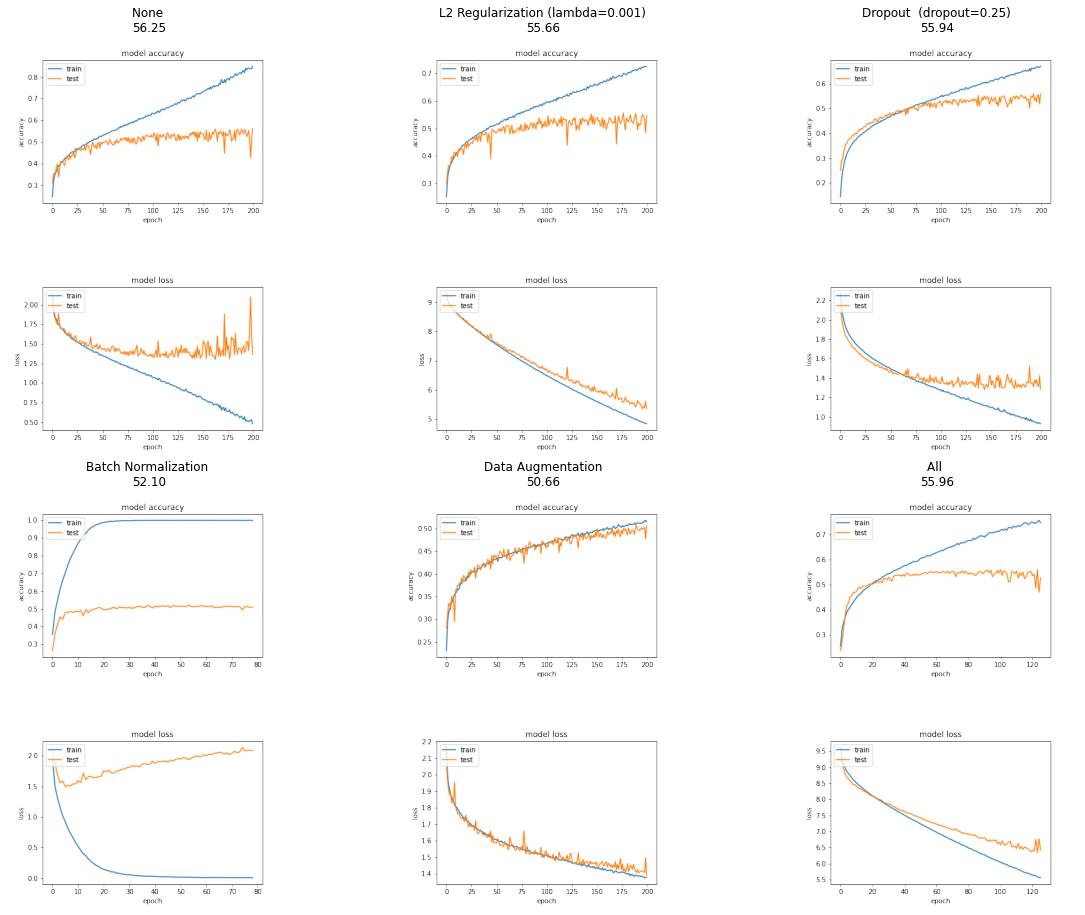

In [ ]:
fig, axs = plt.subplots(4,3,figsize=(20,16))
for ax in axs:
    for a in ax:
        a.set_axis_off()

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            if "4" in data["parameters"]["name_model"]:
                
                if data["parameters"]["batch_norm"] and data["parameters"]["dropout"]>0:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[2,2].set_title("All \n"+'{:.2f}'.format(getBestValAcc(data)*100))
                    axs[2,2].imshow(img)
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[3,2].imshow(img)
                elif "l2_reg" in data["parameters"].keys() and data["parameters"]["l2_reg"]==0.001:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[0,1].imshow(img)
                    axs[0,1].set_title("L2 Regularization (lambda=0.001)\n"+'{:.2f}'.format(getBestValAcc(data)*100))
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[1,1].imshow(img)
                elif data["parameters"]["dropout"]==0.25:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[0,2].set_title("Dropout  (dropout=0.25)\n"+'{:.2f}'.format(getBestValAcc(data)*100))
                    axs[0,2].imshow(img)
                    
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[1,2].imshow(img)
        
                elif data["parameters"]["batch_norm"]:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[2,0].set_title("Batch Normalization \n"+'{:.2f}'.format(getBestValAcc(data)*100))
                    axs[2,0].imshow(img)
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[3,0].imshow(img)
                elif data["parameters"]["data_aug"]:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[2,1].set_title("Data Augmentation\n"+'{:.2f}'.format(getBestValAcc(data)*100))
                    axs[2,1].imshow(img)
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[3,1].imshow(img)
                elif data["parameters"]["name_model"]=="MLP-4layers" and data["parameters"]["initial_lr"]==0.01:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[0,0].set_title("None \n"+'{:.2f}'.format(getBestValAcc(data)*100))
                    axs[0,0].imshow(img)
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[1,0].imshow(img)